<h2>Titanic Passanger Survival Analysis</h2>

In [3]:
from IPython.display import Image


In [4]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [ ]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# **Total rows and columns**

We see that there are 891 rows and 12 columns in our training dataset.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Survived     418 non-null    object 
 8   Title        418 non-null    int64  
 9   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 32.8+ KB


### Data Dictionary

* 1. Survived: 0 = No, 1 = Yes
* 2. Pclass: Class based on ticket -- 1 = 1st, 2 = 2nd, 3 = 3rd
* 3. sibsp: # of siblings / spouses aboard the Titanic
* 4. parch: # of parents / children aboard the Titanic
* 5. ticket: Ticket number
* 6. cabin: Cabin number
* 7. embarked: Port of Embarkation C = "Cherbourg", Q = "Queenstown", S = "Southampton"



In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,0,0.4
1,1,1,1,38.0,71.2833,0.8,1,2,0.4
2,1,3,1,26.0,7.9250,2.0,0,1,0.0
3,1,1,1,35.0,53.1000,0.8,0,2,0.4
4,0,3,0,35.0,8.0500,2.0,0,0,0.0
5,0,3,0,30.0,8.4583,2.0,2,0,0.0
6,0,1,0,54.0,51.8625,1.6,0,0,0.0
7,0,3,0,2.0,21.0750,2.0,0,3,1.6
8,1,3,1,27.0,11.1333,2.0,0,2,0.8
9,1,2,1,14.0,30.0708,1.8,1,2,0.4


In [ ]:
train.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.372806,32.204208,1.669585,0.361392,0.710438,0.361841
std,0.486592,0.836071,0.477990,13.227346,49.693429,0.540335,0.635673,0.968778,0.645383
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,7.910400,1.600000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,30.000000,14.454200,2.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000,1.000000,0.400000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.800000,2.000000,3.000000,4.000000


In [ ]:
test.describe()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.660287,35.560845,1.687081,0.464115,0.732057,0.335885
std,120.810458,0.841838,0.481622,12.955328,55.856972,0.563371,0.685516,0.972019,0.607629
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,22.000000,7.895800,1.600000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,28.500000,14.454200,2.000000,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,36.500000,31.471875,2.000000,1.000000,1.000000,0.400000
max,1309.000000,3.000000,1.000000,76.000000,512.329200,2.400000,2.000000,3.000000,4.000000


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [ ]:
test.isnull().sum()
test["Survived"] = ""
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,34.5,7.8292,2.0,2,,0,0.0
1,893,3,1,47.0,7.0000,2.0,0,,2,0.4
2,894,2,0,62.0,9.6875,2.0,2,,0,0.0
3,895,3,0,27.0,8.6625,2.0,0,,0,0.0
4,896,3,1,22.0,12.2875,2.0,0,,2,0.8


# Data Visualization using Matplotlib and Seaborn packages.

In [ ]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# Bar Chart for Categorical Features 

* Pclass
* Sex
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Embarked
* Cabin

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 1    233
0    109
Name: Sex, dtype: int64
Dead:
 0    468
1     81
Name: Sex, dtype: int64


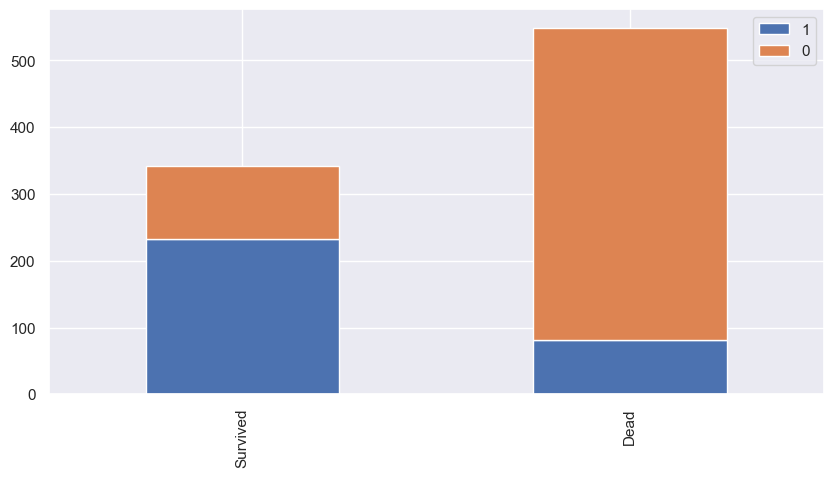

In [ ]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

The Chart confirms **Women more likely survivied than Men**.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


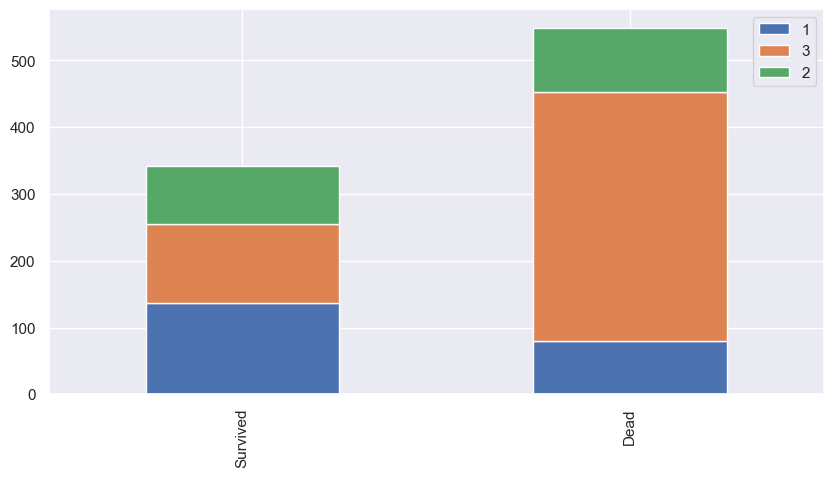

In [ ]:
bar_chart('Pclass')
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

The Chart confirms **1st class** more likely survivied than **other classes**.  
The Chart confirms **3rd class** more likely dead than **other classes**

In [ ]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

KeyError: 'SibSp'

The Chart confirms a **person aboarded with more than 2 siblings or spouse** more likely survived.  
The Chart confirms a **person aboarded without siblings or spouse** more likely dead

In [ ]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

The Chart confirms a **person aboarded with more than 2 parents or children more likely survived.**  
The Chart confirms a **person aboarded alone more likely dead**

In [ ]:
bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

The Chart confirms a **person aboarded from C** slightly more likely survived.  
The Chart confirms a **person aboarded from Q** more likely dead.  
The Chart confirms a **person aboarded from S** more likely dead.  

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.

In [ ]:
train.head()

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,0,0.4
1,1,1,1,38.0,71.2833,0.8,1,2,0.4
2,1,3,1,26.0,7.9250,2.0,0,1,0.0
3,1,1,1,35.0,53.1000,0.8,0,2,0.4
4,0,3,0,35.0,8.0500,2.0,0,0,0.0
5,0,3,0,30.0,8.4583,2.0,2,0,0.0
6,0,1,0,54.0,51.8625,1.6,0,0,0.0
7,0,3,0,2.0,21.0750,2.0,0,3,1.6
8,1,3,1,27.0,11.1333,2.0,0,2,0.8
9,1,2,1,14.0,30.0708,1.8,1,2,0.4


In [ ]:
train_test_data = [train,test] # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

KeyError: 'Name'

In [ ]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

#### Title Map

Mr : 0   
Miss : 1  
Mrs: 2  
Others: 3  

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [ ]:
dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,34.5,7.8292,2.0,2,,NaN,0.0
1,893,3,1,47.0,7.0000,2.0,0,,NaN,0.4
2,894,2,0,62.0,9.6875,2.0,2,,NaN,0.0
3,895,3,0,27.0,8.6625,2.0,0,,NaN,0.0
4,896,3,1,22.0,12.2875,2.0,0,,NaN,0.8


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,34.5,7.8292,2.0,2,,NaN,0.0
1,893,3,1,47.0,7.0000,2.0,0,,NaN,0.4
2,894,2,0,62.0,9.6875,2.0,2,,NaN,0.0
3,895,3,0,27.0,8.6625,2.0,0,,NaN,0.0
4,896,3,1,22.0,12.2875,2.0,0,,NaN,0.8


In [ ]:
bar_chart('Title')

TypeError: no numeric data to plot

In [ ]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

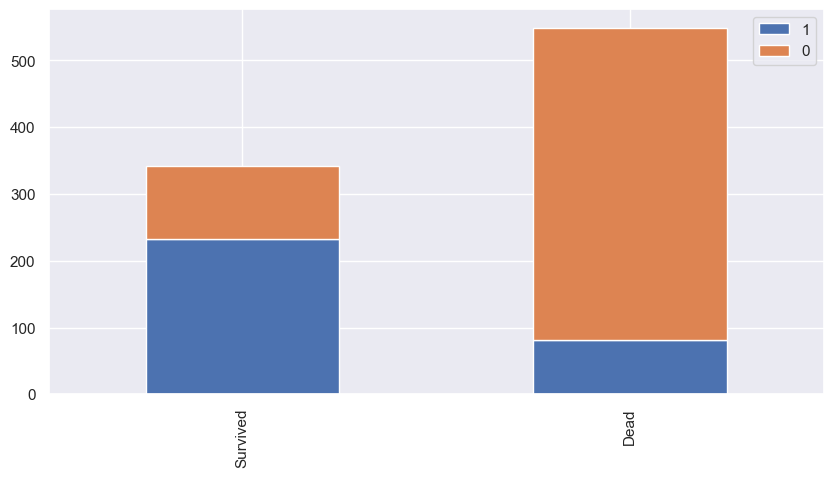

In [ ]:
bar_chart('Sex')

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,34.5,7.8292,2.0,2,,NaN,0.0
1,893,3,1,47.0,7.0000,2.0,0,,NaN,0.4
2,894,2,0,62.0,9.6875,2.0,2,,NaN,0.0
3,895,3,0,27.0,8.6625,2.0,0,,NaN,0.0
4,896,3,1,22.0,12.2875,2.0,0,,NaN,0.8


In [ ]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In [ ]:
train.head(30)
#train.groupby("Title")["Age"].transform("median")

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,NaN,0.4
1,1,1,1,38.0,71.2833,0.8,1,NaN,0.4
2,1,3,1,26.0,7.9250,2.0,0,NaN,0.0
3,1,1,1,35.0,53.1000,0.8,0,NaN,0.4
4,0,3,0,35.0,8.0500,2.0,0,NaN,0.0
5,0,3,0,30.0,8.4583,2.0,2,NaN,0.0
6,0,1,0,54.0,51.8625,1.6,0,NaN,0.0
7,0,3,0,2.0,21.0750,2.0,0,NaN,1.6
8,1,3,1,27.0,11.1333,2.0,0,NaN,0.8
9,1,2,1,14.0,30.0708,1.8,1,NaN,0.4


C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


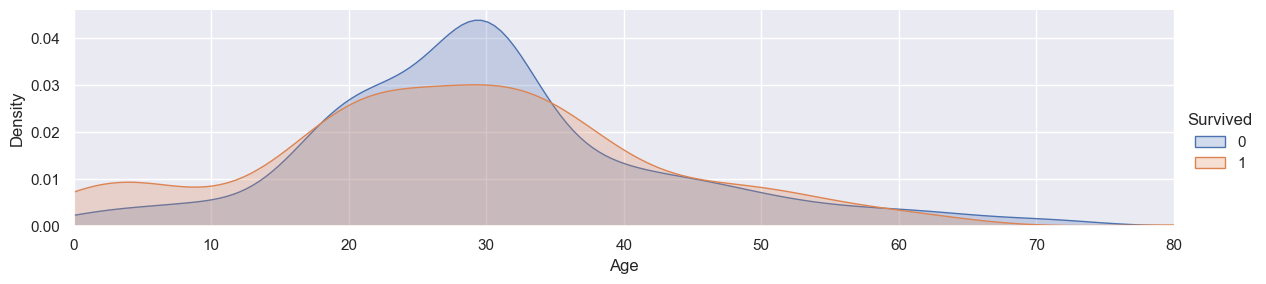

C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(10.0, 50.0)

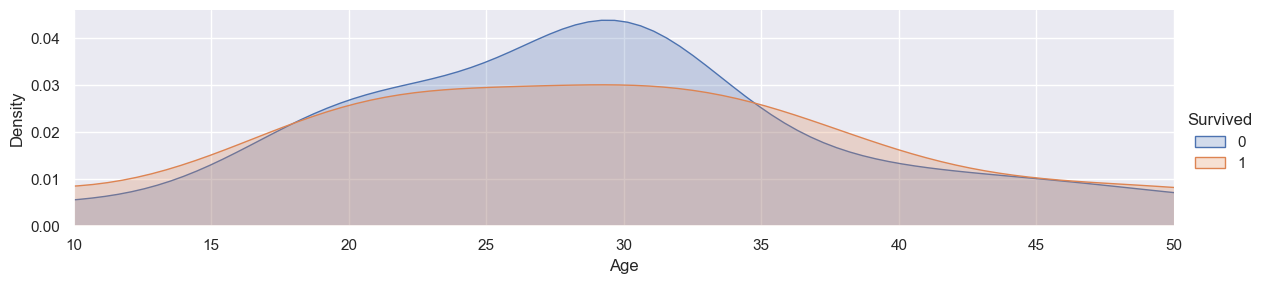

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)


Those who were **20 to 30 years old** were **more dead and more survived.**

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       0 non-null      float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    flo

**Binning**

Binning/Converting Numerical Age to Categorical Variable

feature vector map:
* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,NaN,0.4
1,1,1,1,38.0,71.2833,0.8,1,NaN,0.4
2,1,3,1,26.0,7.9250,2.0,0,NaN,0.0
3,1,1,1,35.0,53.1000,0.8,0,NaN,0.4
4,0,3,0,35.0,8.0500,2.0,0,NaN,0.0


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
# for dataset in train_test_data:
#     dataset.loc[]
#train[train['Age'].isin([23])]

ValueError: Must have equal len keys and value when setting with an iterable

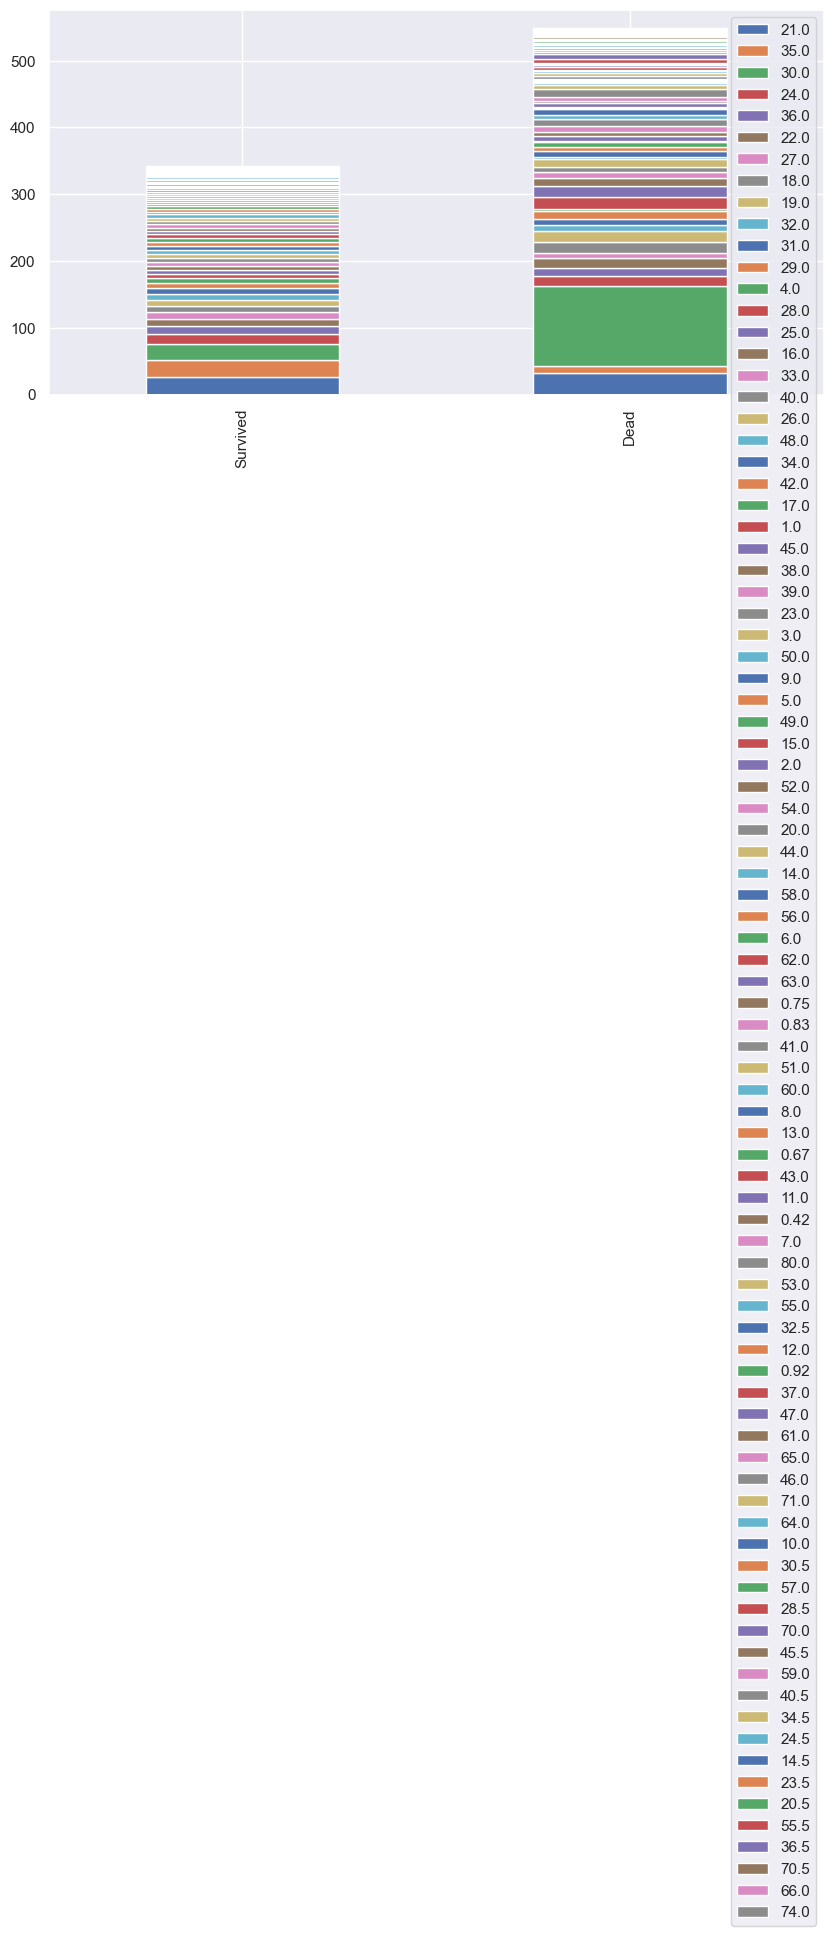

In [ ]:
train.head()
bar_chart('Age')

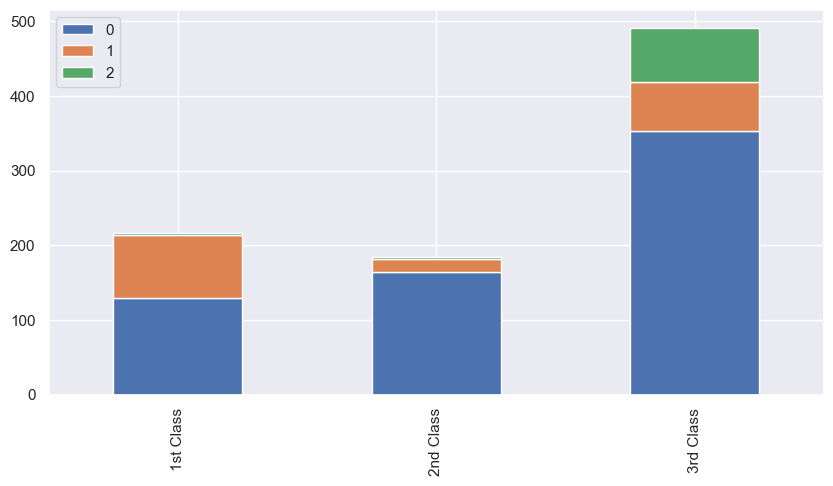

Pclass1:
 0    129
1     85
2      2
Name: Embarked, dtype: int64
Pclass2:
 0    164
1     17
2      3
Name: Embarked, dtype: int64
Pclass3:
 0    353
2     72
1     66
Name: Embarked, dtype: int64


In [ ]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

more than 50 % of 1st class are from S embark.  
more than 50 % of 2st class are from S embark.   
more than 50 % of 3st class are from S embark.  

**fill out missing embark with S embark**

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,NaN,0.4
1,1,1,1,38.0,71.2833,0.8,1,NaN,0.4
2,1,3,1,26.0,7.9250,2.0,0,NaN,0.0
3,1,1,1,35.0,53.1000,0.8,0,NaN,0.4
4,0,3,0,35.0,8.0500,2.0,0,NaN,0.0


In [ ]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
# train["Fare"].fillna(train.groupby("Pclass")["Fare"])
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# train.head(50)


# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,NaN,NaN,0.4
1,1,1,1,38.0,71.2833,0.8,NaN,NaN,0.4
2,1,3,1,26.0,7.9250,2.0,NaN,NaN,0.0
3,1,1,1,35.0,53.1000,0.8,NaN,NaN,0.4
4,0,3,0,35.0,8.0500,2.0,NaN,NaN,0.0
5,0,3,0,30.0,8.4583,2.0,NaN,NaN,0.0
6,0,1,0,54.0,51.8625,1.6,NaN,NaN,0.0
7,0,3,0,2.0,21.0750,2.0,NaN,NaN,1.6
8,1,3,1,27.0,11.1333,2.0,NaN,NaN,0.8
9,1,2,1,14.0,30.0708,1.8,NaN,NaN,0.4


C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


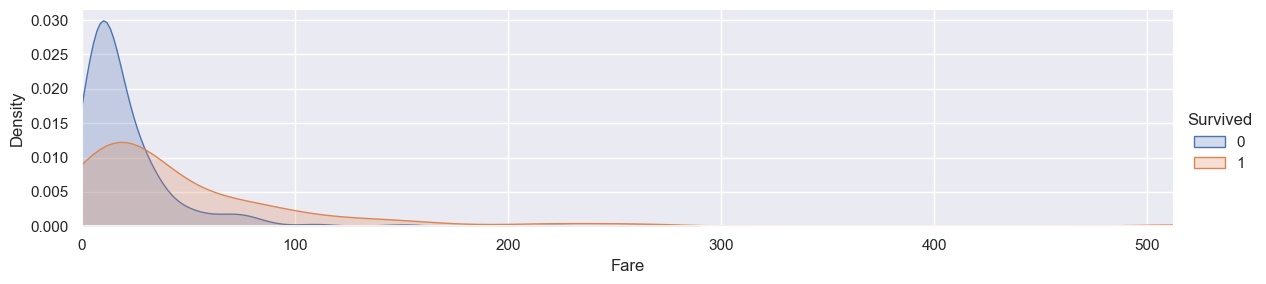

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

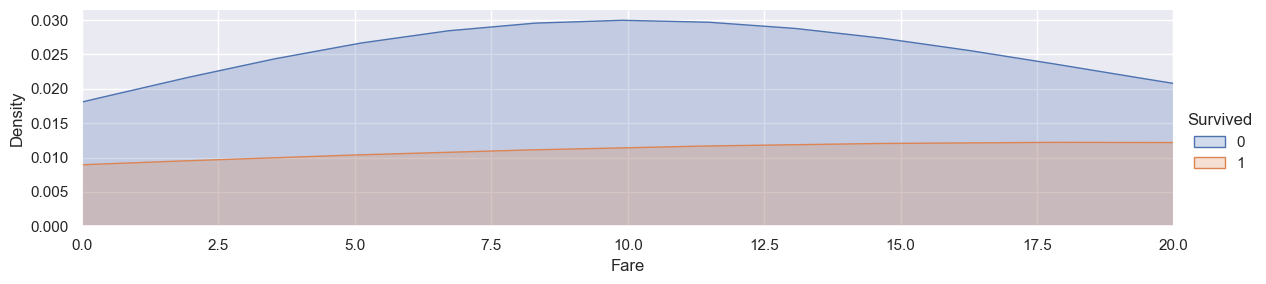

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
train.head()

In [ ]:
train.Cabin.value_counts()

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

<Axes: >

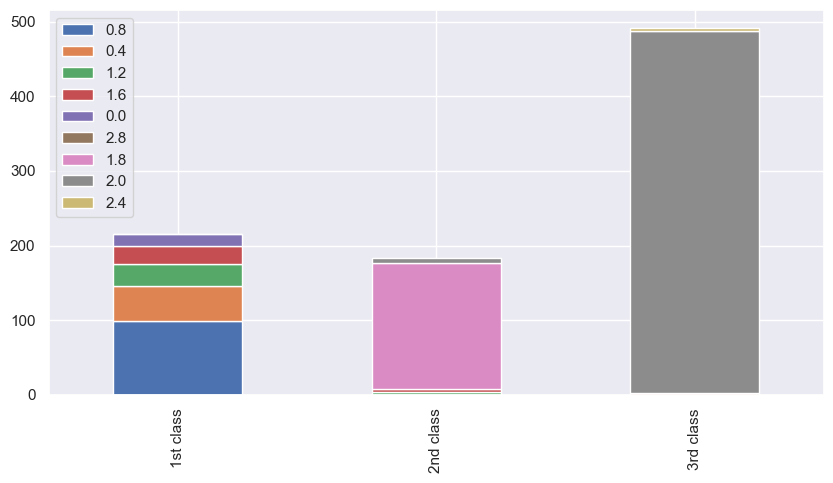

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

**family Size**

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

KeyError: 'SibSp'

C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\prern\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 4.0)

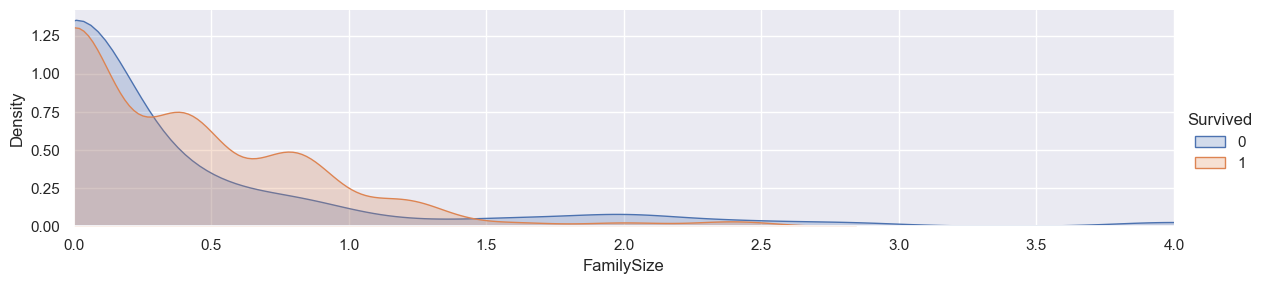

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,NaN,NaN,NaN,NaN
1,1,1,1,38.0,71.2833,NaN,NaN,NaN,NaN
2,1,3,1,26.0,7.9250,NaN,NaN,NaN,NaN
3,1,1,1,35.0,53.1000,NaN,NaN,NaN,NaN
4,0,3,0,35.0,8.0500,NaN,NaN,NaN,NaN


In [ ]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

KeyError: "['Ticket', 'SibSp', 'Parch'] not found in axis"

In [ ]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

In [ ]:
train_data.head(10)

# 5. Modelling

In [ ]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
train.info()

# 6.Cross Validation(k-fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.79775281 0.70786517 0.66292135 0.69662921 0.73033708
 0.75280899 0.73033708 0.71910112 0.74157303]


In [ ]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 72.39
Score of Model 1 : 76.66
Score of Model 2 : 80.47
Score of Model 3 : 79.23
Score of Model 4 : 67.34
Score of Model 5 : 76.77
Score of Model 6 : 81.15
Score of Model 7 : 81.37
Score of Model 8 : 80.02


In [ ]:
test_data['Survived'] = prediction
submission = pd.DataFrame(test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")